In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
import re
import matplotlib

In [19]:
with open('CV_Graphs199.pkl', 'rb') as file:
    CV_Graphs = pickle.load(file)
with open('JD_Graphs199.pkl', 'rb') as file:
    JD_Graphs = pickle.load(file)

In [9]:
CV_Graphs.pop(173, None)
CV_Graphs.pop(186, None)

In [10]:
CV_Graphs.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])

In [20]:

def combine_graphs(graphs):
    # Create an empty mega graph
    mega_graph = nx.Graph()

    # Iterate through each graph in the list
    for graph in graphs:
        # Add nodes and edges from each graph to the mega graph
        mega_graph.add_nodes_from(graph.nodes(data=True))
        mega_graph.add_edges_from(graph.edges(data=True))

    return mega_graph

In [21]:
# Combine the graphs into a mega graph
G_CV = combine_graphs(list(CV_Graphs.values()))

In [22]:
# Combine the graphs into a mega graph
G_JD = combine_graphs(list(JD_Graphs.values()))

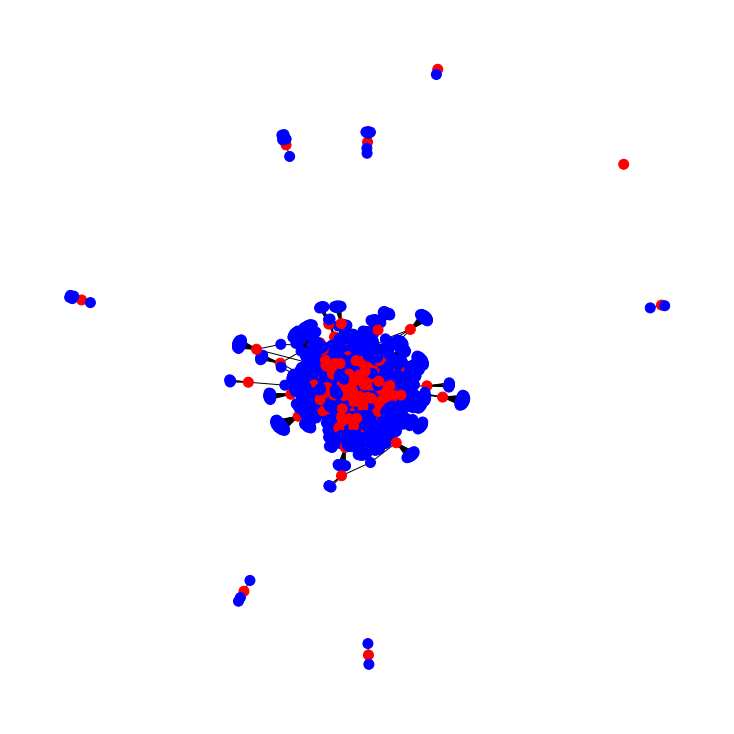

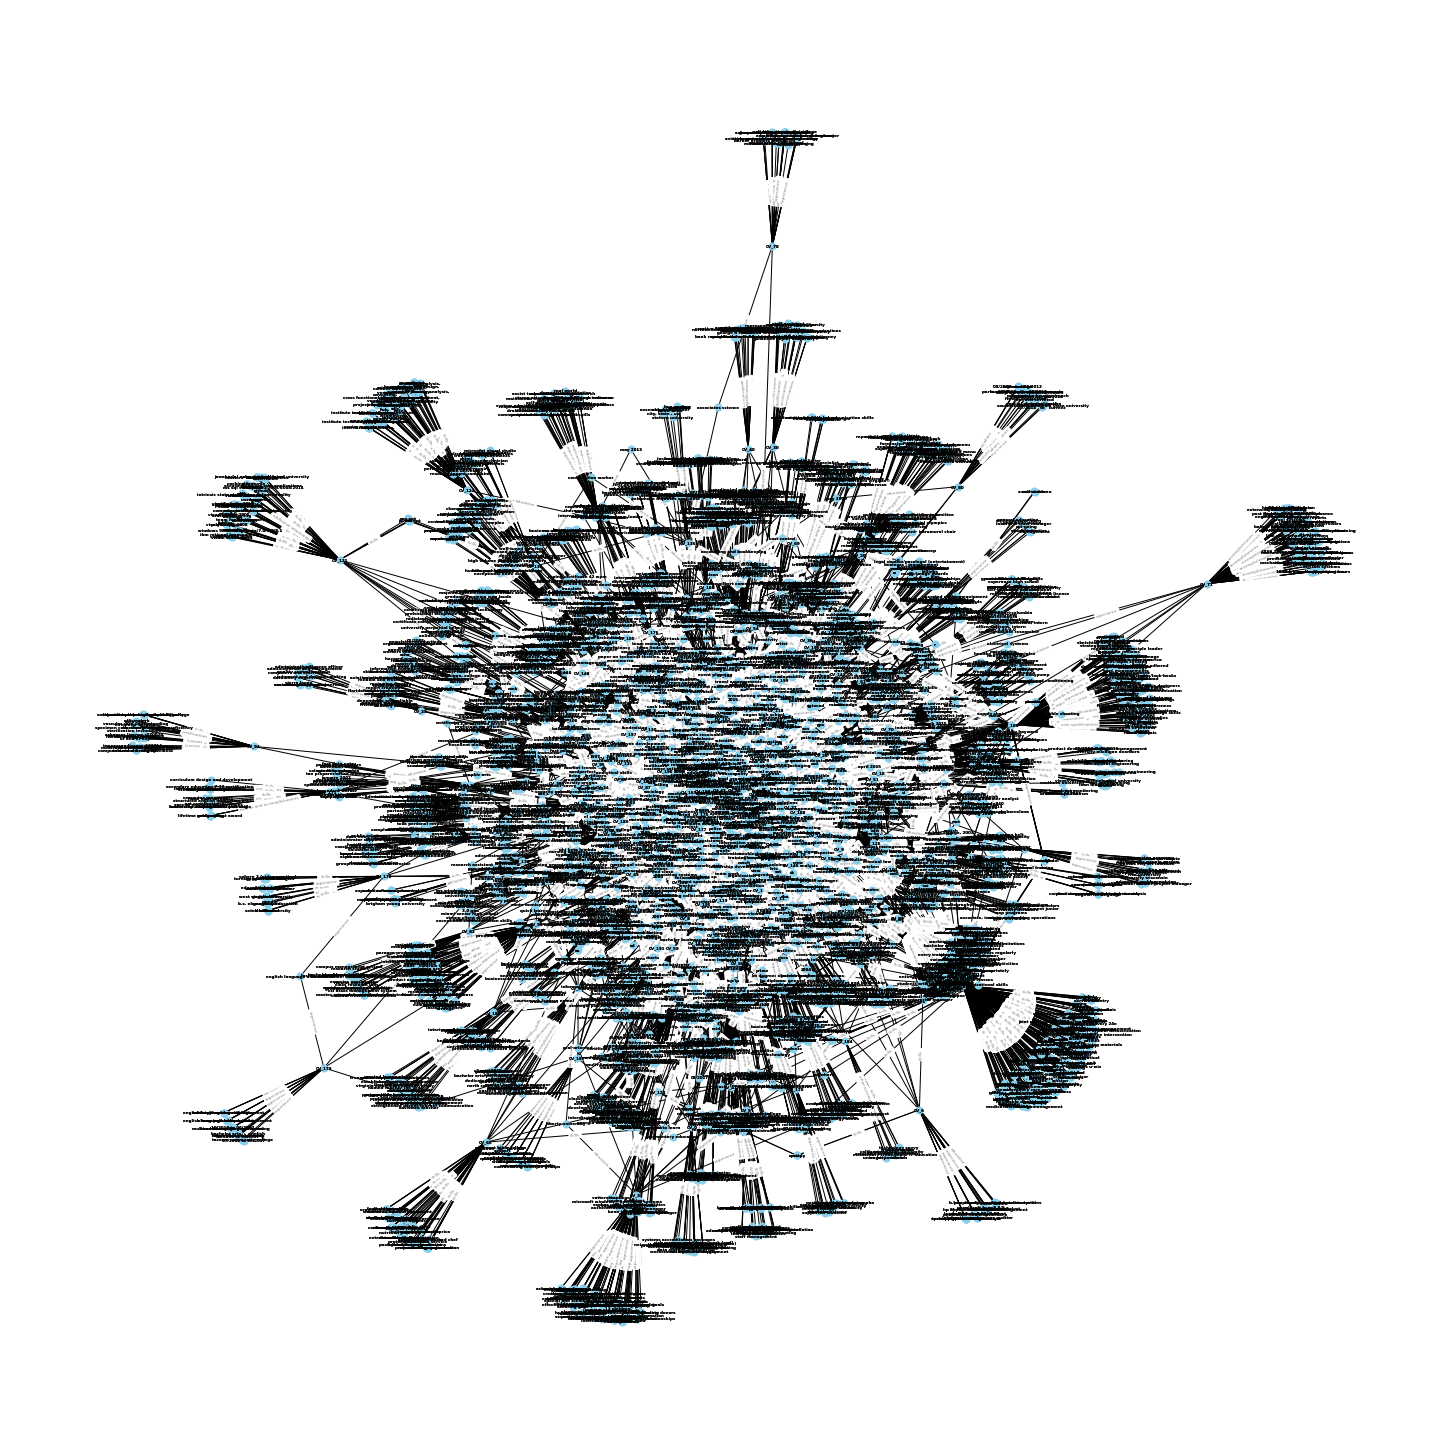

In [14]:
node_colors = []
for node in G_CV.nodes():
    if node.startswith("CV"):
        node_colors.append('green')
    elif node.startswith("JD"):
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Draw the graph with specified node colors
pos = nx.spring_layout(G_CV)
labels = nx.get_edge_attributes(G_CV, 'label')
node_labels = nx.get_node_attributes(G_CV, 'label')

plt.figure(figsize=(20, 20))
nx.draw(G_CV, pos, with_labels=True, font_size=4, node_size=50, node_color='skyblue', font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G_CV, pos, edge_labels=labels,font_size=4,font_color='grey')
nx.draw_networkx_labels(G_CV, pos, labels=node_labels, font_size=4, font_color='black', font_weight='bold')
plt.show()

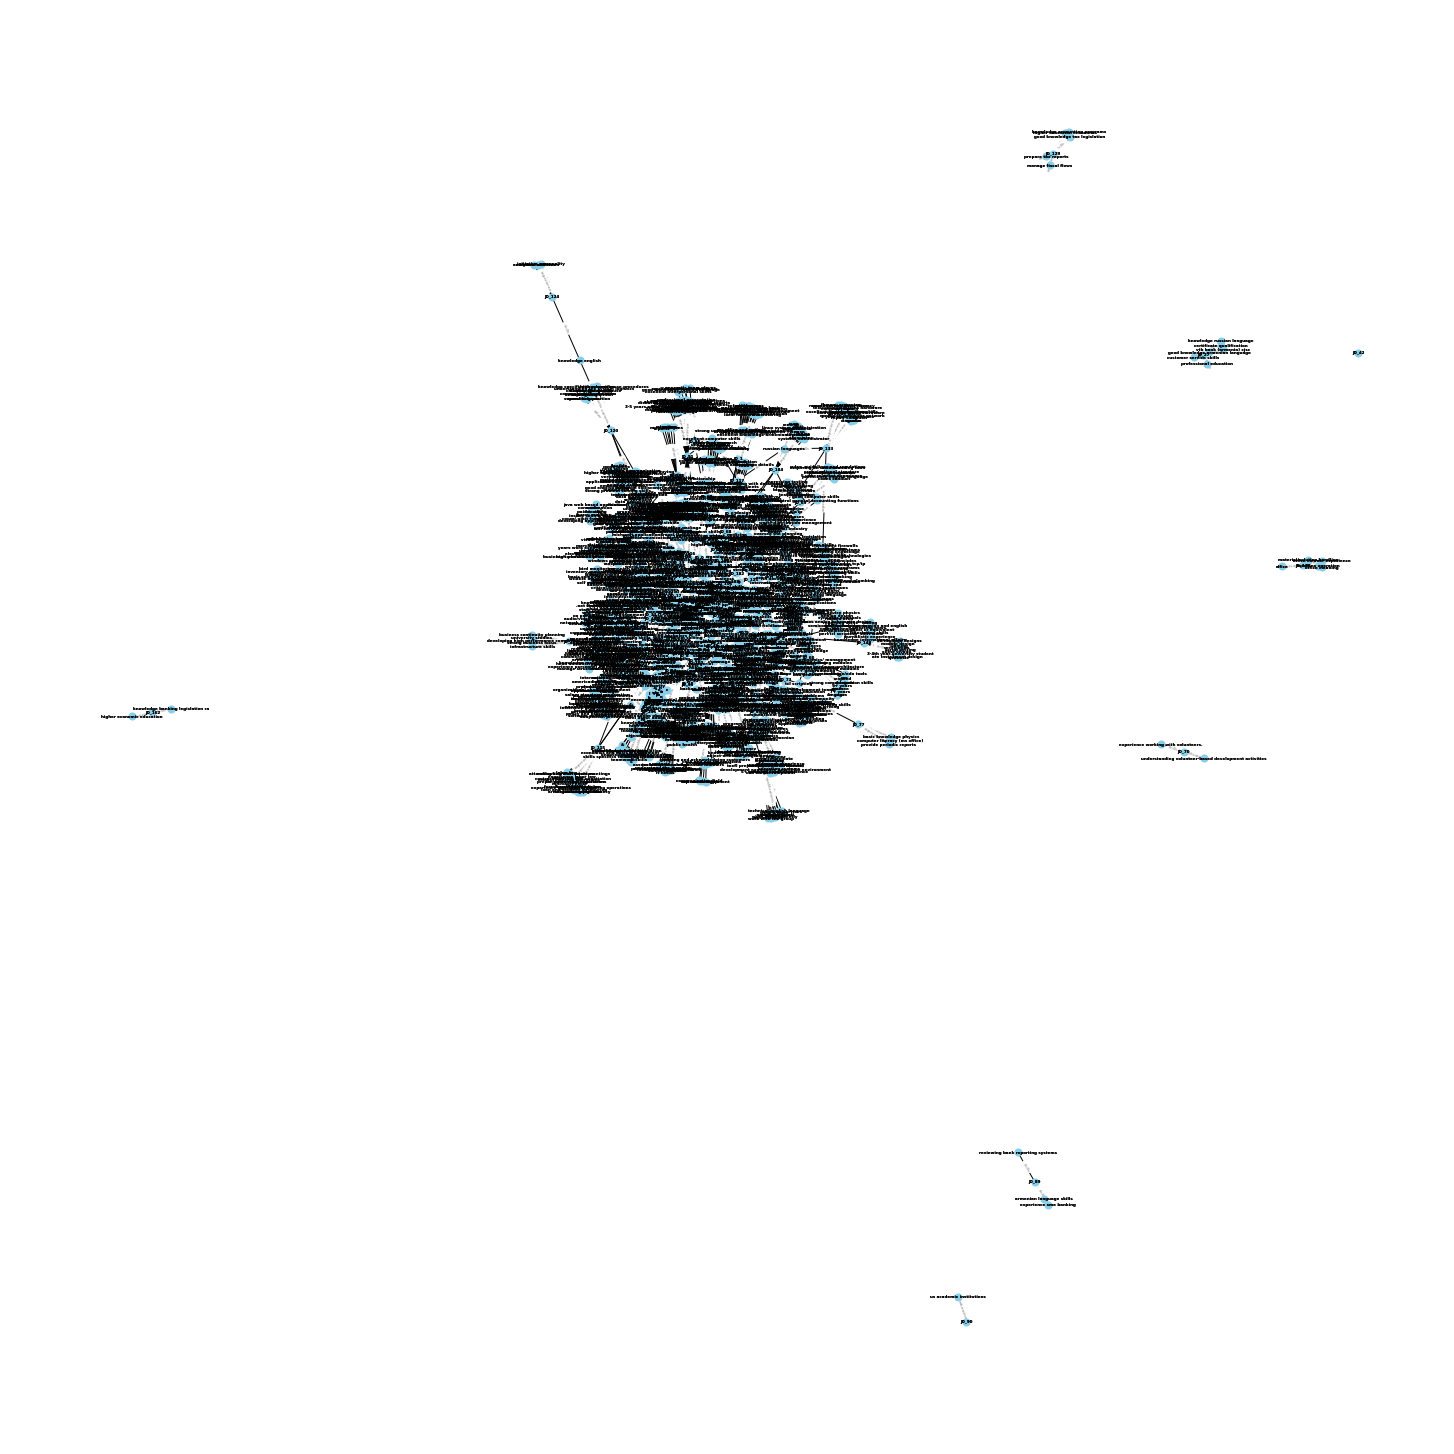

In [15]:
node_colors = []
for node in G_JD.nodes():
    if node.startswith("CV"):
        node_colors.append('green')
    elif node.startswith("JD"):
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Draw the graph with specified node colors
pos = nx.spring_layout(G_JD)
labels = nx.get_edge_attributes(G_JD, 'label')
node_labels = nx.get_node_attributes(G_JD, 'label')

plt.figure(figsize=(20, 20))
nx.draw(G_JD, pos, with_labels=True, font_size=4, node_size=50, node_color='skyblue', font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G_JD, pos, edge_labels=labels,font_size=4,font_color='grey')
nx.draw_networkx_labels(G_JD, pos, labels=node_labels, font_size=4, font_color='black', font_weight='bold')
plt.show()

## without e

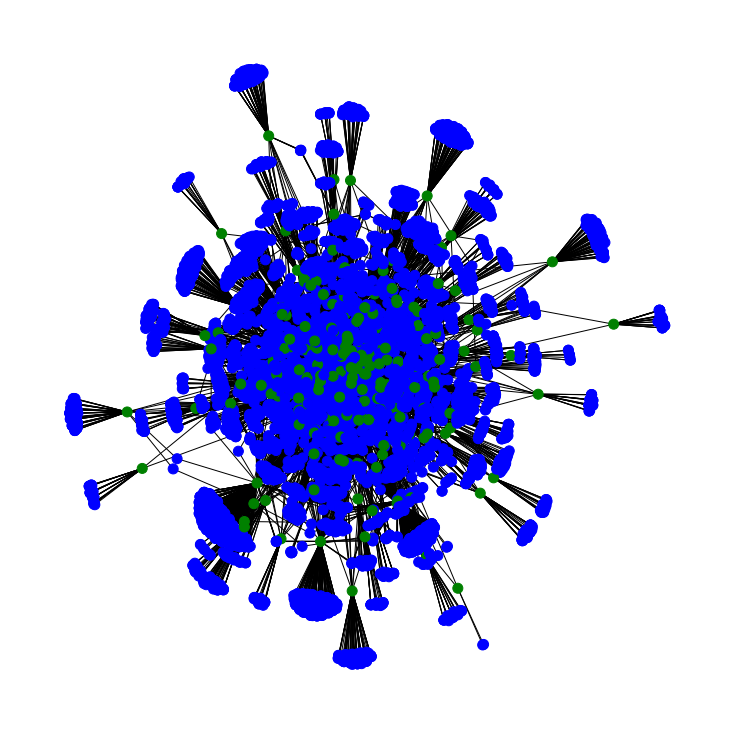

In [17]:
node_colors = []
for node in G_CV.nodes():
    if node.startswith("CV"):
        node_colors.append('green')
    elif node.startswith("JD"):
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Draw the graph with specified node colors
posG_JD = nx.spring_layout(G_CV)
labelsG_JD = nx.get_edge_attributes(G_CV, 'label')
node_labelsG_JD = nx.get_node_attributes(G_CV, 'label')

plt.figure(figsize=(10, 10))
nx.draw(G_CV, posG_JD, with_labels=False, node_size=100, node_color=node_colors)
plt.show()

In [ ]:
node_colorsG_JD = []
for node in G_JD.nodes():
    if node.startswith("CV"):
        node_colorsG_JD.append('green')
    elif node.startswith("JD"):
        node_colorsG_JD.append('red')
    else:
        node_colorsG_JD.append('blue')

# Draw the graph with specified node colors
posG_JD = nx.spring_layout(G_JD)
labelsG_JD = nx.get_edge_attributes(G_JD, 'label')
node_labelsG_JD = nx.get_node_attributes(G_JD, 'label')

plt.figure(figsize=(10, 10))
nx.draw(G_JD, posG_JD, with_labels=False, node_size=100, node_color=node_colorsG_JD)
plt.show()

---

In [15]:
# Save the list to a file
with open('CV_FKG.pkl', 'wb') as file:
    pickle.dump(G, file)
with open('JD_FKG.pkl', 'wb') as file:
    pickle.dump(G_JD , file)    

In [28]:
import networkx as nx

def remove_missing_nodes(graph, nodes):
    return [node for node in nodes if graph.has_node(node)]


def rank_unpinned_nodes(graph, pinned_nodes, prefix_filter=None):
    # Remove missing nodes from pinned_nodes
    pinned_nodes = remove_missing_nodes(graph, pinned_nodes)
    print('Available pinned nodes:', pinned_nodes)

    # Create a subgraph containing pinned nodes, their neighbors, and 2-hop neighbors
    neighbors_of_pinned_nodes = set()
    for node in pinned_nodes:
        neighbors_of_pinned_nodes.update(graph.neighbors(node))

        # 2-hop neighbors
        neighbors_of_pinned_nodes.update(graph.neighbors(neighbor) for neighbor in graph.neighbors(node))

        # 3-hop neighbors
        neighbors_of_pinned_nodes.update(neighbor for neighbor in neighbors_of_pinned_nodes)

    subgraph = graph.subgraph(pinned_nodes + list(neighbors_of_pinned_nodes))


    # Calculate node ranks based on degree centrality
    node_ranks = nx.degree_centrality(subgraph)

    # Sort unpinned nodes by their rank in descending order
    unpinned_nodes = [node for node in graph.nodes() if node not in pinned_nodes and node_ranks.get(node) is not None]
    sorted_unpinned_nodes = sorted(unpinned_nodes, key=node_ranks.get, reverse=True)

    # Filter nodes based on prefix (e.g., "CV_" or "JD_")
    if prefix_filter is not None:
        sorted_unpinned_nodes = [node for node in sorted_unpinned_nodes if str(node).startswith(prefix_filter)]
        serial = [int(node.split("_")[1]) for node in sorted_unpinned_nodes]

    # Return the sorted unpinned nodes
    return sorted_unpinned_nodes, serial, subgraph



In [43]:
# Example usage:
# Create the updated graph
#G = nx.Graph()
#G.add_edges_from([('CV_1', 2),('CV_1', 4), (1, 3), (2, 'CV_3'), (2, 4), ('CV_3', 'CV_5'), (1, 'CV_5'), (4, 5), (4, 6), ('CV_5', 6)])

# Define pinned nodes (including one missing node)
pinned_nodes = list(JD_Graphs[171].nodes())

# Get ranked unpinned nodes starting with "CV_" or "JD_"
ranked_unpinned_nodes, job_no,subgraph = rank_unpinned_nodes(G_CV, pinned_nodes, prefix_filter="CV_")

# Print the result
print("Recommended JD No:", job_no)

Available pinned nodes: ['business administration', 'retail', 'sales', 'organizational skills', 'communication skills', 'interpersonal skills', 'customer service']
Recommended JD No: [61, 98, 12, 17, 19, 24, 26, 31, 60, 87, 88, 90, 93, 95, 106, 108, 111, 115, 126, 128, 129, 133, 139, 141, 175, 190, 193, 196, 11, 13, 14, 15, 22, 23, 25, 27, 36, 37, 38, 44, 45, 46, 50, 62, 63, 67, 80, 81, 82, 89, 92, 94, 96, 99, 102, 107, 110, 113, 114, 116, 118, 120, 122, 125, 127, 130, 131, 142, 146, 150, 151, 153, 157, 160, 161, 167, 169, 177, 194, 197, 198]


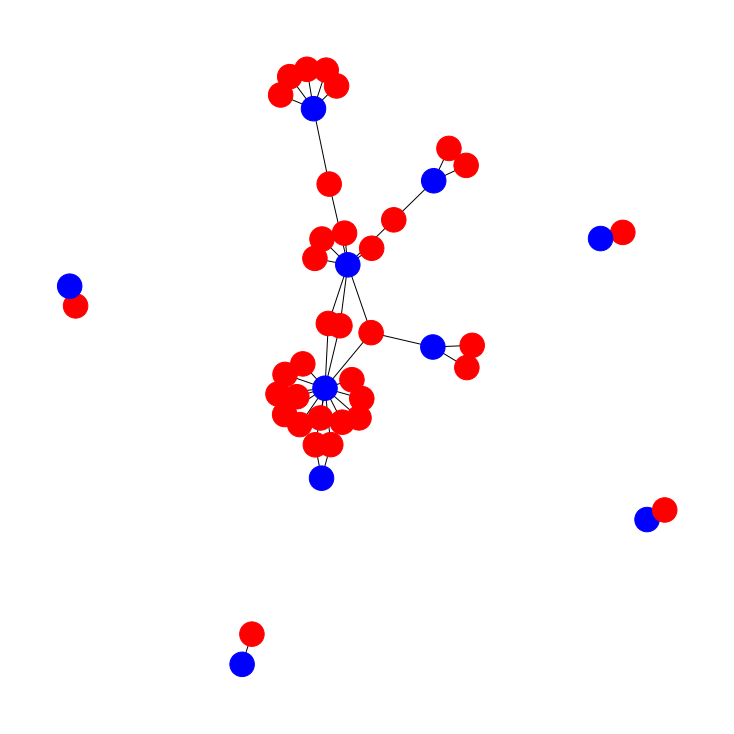

In [39]:
node_colors = []
for node in subgraph.nodes():
    if node.startswith("CV"):
        node_colors.append('green')
    elif node.startswith("JD"):
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Draw the graph with specified node colors
posG_JD = nx.spring_layout(subgraph)
labelsG_JD = nx.get_edge_attributes(subgraph, 'label')
node_labelsG_JD = nx.get_node_attributes(subgraph, 'label')

plt.figure(figsize=(10, 10))
nx.draw(subgraph, posG_JD, with_labels=False, node_size=600,  node_color=node_colors)
# nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels,font_size=4,font_color='grey')
# nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=4, font_color='black', font_weight='bold')
plt.show()